## Luke Schwenke
### Machine Learning: Homework 5 - Recommender System & Neural Network
### May 6, 2023

In [1]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cosine

In [82]:
df = pd.read_csv('radio_songs.csv')

In [ ]:
df.head()

In [ ]:
df.user.unique()

## 1(a)

Recommend 10 songs to users who have listened to 'u2' and 'pink floyd'. Use item-item collaborative filtering to find songs that are similar using spatial distance with cosine. Since this measures the distance you need to subtract from 1 to get similarity as shown below.

In [103]:
# Load dataframe
df = pd.read_csv('radio_songs.csv')

# Get list of users
users = list(df['user'])

# Get list of songs/artists
songs = list(df.columns[1:])

# Drop user columns
df.drop('user', axis=1, inplace=True)

# Calculate cosine similarity between users
user_similarity = cosine_similarity(df)

# Calculate cosine similarity between items - needs transpose
item_similarity = cosine_similarity(df.T)

# Get the index values for u2 and Pink Floyd
u2_index = songs.index('u2')
pink_floyd_index = songs.index('pink floyd')

# Get the most similar
similar_songs = np.argsort(item_similarity[u2_index]+item_similarity[pink_floyd_index])[::-1][2:12]

for i in  similar_songs:
    print(i,songs[i])

220 robbie williams
105 genesis
136 johnny cash
176 misfits
22 audioslave
101 foo fighters
200 pearl jam
111 green day
71 depeche mode
116 hans zimmer


## 1(b)

Find user most similar to user 1606. Use user-user collaborative filtering with cosine similarity. List the recommended songs for user 1606 (Hint: find the songs listened to by the most similar user).

In [4]:
# Set target user to be user 1606, set test to be all other users
target_user = df.loc[(df['user'] == 1606)]
test_user = df[df['user'] != 1606]
print(target_user.shape)
print(test_user.shape)

(1, 285)
(99, 285)


In [5]:
# Remove user column
target_user = target_user.drop(['user'], axis=1)
test_user = test_user.drop(['user'], axis=1)

In [64]:
user_similarity = []
for i in range(len(test_user)):
    this_similarity = 1 - cosine(np.array(target_user.iloc[0]), np.array(test_user.iloc[i]))
    user_similarity.append(this_similarity)

In [68]:
# Rank users according to user similarity with user 1606 in descending order
indices = np.argsort(user_similarity)[::-1]
closest_user = test_user.iloc[indices[0:10]]
closest_user

,abba,ac/dc,adam green,aerosmith,afi,air,alanis morissette,alexisonfire,alicia keys,all that remains,...,timbaland,tom waits,tool,tori amos,travis,trivium,u2,underoath,volbeat,yann tiersen
68,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
89,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [69]:
# Remove users that listens to no song at all
closest_user['Total'] = closest_user.sum(axis=1)
closest_user = closest_user.loc[closest_user['Total'] > 0]

/var/folders/rx/2jqwhb8d31960xlz0g9vlmdh0000gn/T/ipykernel_88773/3928817193.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closest_user['Total'] = closest_user.sum(axis=1)


In [70]:
# Select the top similar user and select songs that are listened by this user
closest_user = closest_user.iloc[0,:]
rec_songs = closest_user[closest_user >= 1]
print('The recommended 10 songs are as follows:\n\n',rec_songs)

The recommended 10 songs are as follows:

 beastie boys                 1
bob dylan                    1
bob marley & the wailers     1
david bowie                  1
elvis presley                1
eric clapton                 1
johnny cash                  1
pearl jam                    1
pink floyd                   1
the beatles                  1
the doors                    1
the rolling stones           1
tom waits                    1
Total                       13
Name: 65, dtype: int64


In [28]:
test_user_orig = df[df['user'] != 1606]
print(test_user_orig.iloc[65][0])

1144


## 1(c)

How many of the recommended songs has already been listened to by user 1606?

In [71]:
# Set target user values
target_user_vals = target_user.iloc[0,:]

# Filter to where the target user (1606) has listened to a song
listened_1066 = target_user_vals[target_user_vals >= 1]

In [72]:
# List what songs User 1606 has listened to that match with the recommended songs
matches = set(listened_1066.index).intersection(set(rec_songs.index))
matches = list(matches)
matches

['elvis presley', 'the beatles']

#### 2 of the recommended songs have already been listened to by user 1606

## 1(d)

Use a combination of user-item approach to build a recommendation score for each song for each user using the following steps for each user-

For each song for the user row, get the top 10 similar songs and their similarity score.
For each of the top 10 similar songs, get a list of the user purchases.
What are the top 5 song recommendations for user 1606?

In [73]:
# Create User Item Matrix
df_no_user = df.drop(['user'], axis=1)
df_no_user.index = df.user

df_user_item = df_no_user
df_user_item.head(3)

,abba,ac/dc,adam green,aerosmith,afi,air,alanis morissette,alexisonfire,alicia keys,all that remains,...,timbaland,tom waits,tool,tori amos,travis,trivium,u2,underoath,volbeat,yann tiersen
user,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
from sklearn.metrics.pairwise import cosine_similarity

# Create song similarity matrix
song_sim_mtx = pd.DataFrame(cosine_similarity(df_user_item.T), 
                            index=df_user_item.columns, 
                            columns=df_user_item.columns)
song_sim_mtx

,abba,ac/dc,adam green,aerosmith,afi,air,alanis morissette,alexisonfire,alicia keys,all that remains,...,timbaland,tom waits,tool,tori amos,travis,trivium,u2,underoath,volbeat,yann tiersen
abba,1.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
ac/dc,0.0,1.000000,0.0,0.0,0.223607,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.223607,0.0,0.200000,0.000000
adam green,0.0,0.000000,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
aerosmith,0.0,0.000000,0.0,1.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
afi,0.0,0.223607,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
trivium,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.866025,...,0.0,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.223607,0.000000
u2,0.0,0.223607,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.0,0.223607,0.000000
underoath,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.288675,0.0,0.000000,...,0.0,0.204124,0.000000,0.0,0.0,0.000000,0.000000,1.0,0.000000,0.000000
volbeat,0.0,0.200000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.258199,...,0.0,0.000000,0.447214,0.0,0.0,0.223607,0.223607,0.0,1.000000,0.447214


In [75]:
song_all = song_sim_mtx.columns
top_songs_df = pd.DataFrame()
for song in song_all:
    top_songs = song_sim_mtx[song].nlargest(11).iloc[1:].reset_index()
    top_songs.columns = ['sim_song', 'similarity']
    top_songs['orig_song'] = song 
    top_songs_df = pd.concat([top_songs_df, top_songs], ignore_index=True)
top_songs_df

,sim_song,similarity,orig_song
0,frank sinatra,0.500000,abba
1,hans zimmer,0.500000,abba
2,howard shore,0.408248,abba
3,elvis presley,0.353553,abba
4,groove coverage,0.353553,abba
...,...,...,...
2835,porcupine tree,0.707107,yann tiersen
2836,dredg,0.447214,yann tiersen
2837,volbeat,0.447214,yann tiersen
2838,radiohead,0.377964,yann tiersen


In [76]:
# Add user_purchase based on purchase history
user = 1606
user_purchase = []
for song in top_songs_df["sim_song"]:
    score = df_user_item.loc[user, song]
    user_purchase.append(score)

top_songs_df['user_purchase'] = user_purchase

In [78]:
import warnings
# the warning was because for certain songs similar score is 0 across every other song
warnings.filterwarnings("ignore", message="invalid value encountered in double_scalars")

# Create a new column that indicates the group each row belongs to
top_songs_df['group'] = top_songs_df.index // 10

# Define a function to compute the recommendation score for each group
def compute_weighted_average_for_group(x):
    return ((x['similarity'] * x['user_purchase']).sum()) / (x['similarity'].sum())

recomm = top_songs_df.groupby('group').apply(compute_weighted_average_for_group)

top_recomm = pd.DataFrame({'song':df_user_item.columns,'recom_score':recomm}).sort_values(by = 'recom_score', ascending = False)

# filter out songs that have already been listened to by the user
songs_listened = df_user_item.loc[user][df_user_item.loc[user] == 1]
top_recomm_clean = top_recomm[~top_recomm['song'].isin(songs_listened.index.tolist())]['song']

print("Recommended songs/artists for user 1606 are: " + ", ".join(top_recomm_clean[:5].tolist()))

Recommended songs/artists for user 1606 are: eric clapton, howard shore, david bowie, dream theater, apocalyptica


## 2 - Concepts

#### Name 2 other similarity measures that you can use instead of cosine similarity above.

* **Pearson correlation coefficient**: This measure is often used in recommender systems to measure the similarity between two users or items. It takes into account the mean and standard deviation of the ratings given by users and can be a more accurate measure of similarity than cosine similarity when the data has a non-zero mean or when the ratings are on different scales.

* **Spearman's rank correlation coefficient**: This measure is based on the rank order of the ratings given by users and can be a good measure of similarity when the data is ordinal, i.e., when the ratings have a specific order but the differences between them are not meaningful.

#### What is needed to build a Content-Based Recommender system?

* To build a Content-Based Recommender system, you need a user profile that contains information about the user's preferences, an item profile that contains information about the items being recommended, and a similarity measure that can be used to compare the user profile with the item profile. The user profile can be collected through explicit or implicit feedback from the user, and the item profile can include features such as genre, director, cast, or plot keywords. The similarity measure can be a simple distance metric such as Euclidean distance or a more complex machine learning algorithm. Once the similarity between the user profile and the item profile is computed, the system can recommend items that are similar to the user's preferences. The system can be further improved by incorporating user feedback and continuously updating the item profiles. Finally, evaluation metrics such as precision and recall can be used to measure the effectiveness of the system.

#### Name 2 methods to evaluate your recommender system.

* **Precision and Recall**: Precision measures the proportion of recommended items that the user finds relevant, while recall measures the proportion of relevant items that are recommended to the user. These metrics are commonly used to evaluate recommender systems, especially in the context of personalized recommendations.

* **Mean Absolute Error (MAE) and Root Mean Square Error (RMSE)**: These metrics are commonly used to evaluate the accuracy of the predicted ratings. MAE measures the average absolute difference between the predicted and actual ratings, while RMSE measures the root mean square difference between the predicted and actual ratings. These metrics are useful when the system is recommending numerical ratings or when the goal is to optimize the accuracy of the recommendations.



## 3 - Neural Network Using Numpy

Redo the example code in the NN using numpy notebook and recalculate the delta change in weight b2 for
different learning rates of 0.0001, 0.01 and 1
and for 10 iterations
What can you conclude about the effect of the learning rate on the delta change in weight b2?

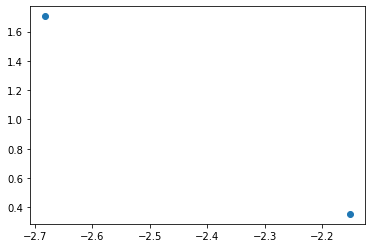

In [51]:
from sklearn.datasets import make_gaussian_quantiles
import matplotlib.pyplot as plt

samples = 2
def load_extra_datasets(N):  
    gaussian_quantiles = make_gaussian_quantiles(mean=None, 
                                                 cov=0.7, 
                                                 n_samples=N, 
                                                 n_features=2, 
                                                 n_classes=2,  
                                                 shuffle=True, 
                                                 random_state=None)
    return  gaussian_quantiles

gaussian_quantiles= load_extra_datasets(samples)

X, Y = gaussian_quantiles

X, Y = X.T, Y.reshape(1, Y.shape[0])

#print(Y)
# Visualize the data
plt.scatter(X[0, :], X[1, :]) #, c=Y, s=40);
plt.show()

In [52]:
n_x = X.shape[0] # size of input layer`
n_h = 4
n_y = Y.shape[0] # size of output layer

print(n_x, n_y)

2 1


In [53]:
import numpy as np

W1 = np.random.randn(n_h,n_x) * 0.01
b1 = np.zeros(shape=(n_h, 1))
W2 = np.random.randn(n_y,n_h) * 0.01
b2 = np.zeros(shape=(n_y, 1))

print("W1\n", W1)
print("b1\n", b1)
print("W2\n", W2)
print("b2\n", b2)

W1
 [[ 0.01588744 -0.01734016]
 [-0.00049339 -0.00025923]
 [-0.01756832 -0.00781923]
 [ 0.00116499 -0.00727187]]
b1
 [[0.]
 [0.]
 [0.]
 [0.]]
W2
 [[ 0.0074596  -0.00590519 -0.00394537  0.00361246]]
b2
 [[0.]]


In [54]:
def sigmoid(x):
    return 1 / (1 + np.e ** -x)

total_cost = -9999

In [55]:
# Implement Forward Propagation to calculate A2 (probabilities)
Z1 = np.dot(W1,X) + b1
A1 = np.tanh(Z1)
Z2 = np.dot(W2,A1) + b2
A2 = sigmoid(Z2) # Final output prediction

print(b2)

[[0.]]


In [56]:
# Compute the cross-entropy cost
old_total_cost = total_cost
cost_function = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2)) #J(theta)
total_cost = -np.sum(cost_function) / samples

print("cost=", total_cost)
print("cost delta=", np.subtract(total_cost, old_total_cost))

cost= 0.6932143793310237
cost delta= 9999.693214379331


In [57]:
print(Z1.shape)
print(A1.shape)
print(Z2.shape)
print(A2.shape)
print(cost_function.shape)

(4, 2)
(4, 2)
(1, 2)
(1, 2)
(1, 2)


In [58]:
dJdZ2 = A2 - Y
dJdW2 = (1 / samples) * np.dot(dJdZ2, A1.T)
dJdb2 = (1 / samples) * np.sum(dJdZ2, axis=1, keepdims=True)
# since activation function is tanh(Z1) = A1
# first derivative of d/dz tanh(z) = 1 - tanh(z) ^ 2 = 1 - A1 ^ 2
dJdZ1 = np.multiply(np.dot(W2.T, dJdZ2), 1 - np.power(A1, 2))
dJdW1 = (1 / samples) * np.dot(dJdZ1, X.T)
dJdb1 = (1 / samples) * np.sum(dJdZ1, axis=1, keepdims=True)

print("dJdZ2=", dJdZ2)
print("dJdW2=", dJdW2)
print("dJdb2=", dJdb2)
print("dJdW1=", dJdW1)
print("dJdb1=", dJdb1)

dJdZ2= [[ 0.4998842  -0.50018295]]
dJdW2= [[7.93233788e-03 2.20550071e-05 3.08649156e-04 2.60806571e-03]]
dJdb2= [[-0.00014937]]
dJdW1= [[ 0.00096973 -0.00250182]
 [-0.00078303  0.0019927 ]
 [-0.00052275  0.00132987]
 [ 0.00047848 -0.00121866]]
dJdb1= [[ 5.53139687e-06]
 [ 8.82318939e-07]
 [ 6.73799286e-07]
 [-3.45494095e-07]]


In [59]:
learning_rate = 0.01
b2_old = b2
print("b2 before=", b2_old)
W1 = W1 - learning_rate * dJdW1
b1 = b1 - learning_rate * dJdb1
W2 = W2 - learning_rate * dJdW2
b2 = b2 - learning_rate * dJdb2

print("b2 after=", b2)

print("delta change=", np.subtract(b2, b2_old))

b2 before= [[0.]]
b2 after= [[1.49373134e-06]]
delta change= [[1.49373134e-06]]


In [60]:
# For 3 different learnings rates, iterate 10 times and find the change in b2

learning_rates = [0.0001, 0.01, 1]

for lr in learning_rates:
    b2_old = b2
    print("Learning rate:", lr, "\n")
    print("b2 before=", b2_old)
    
    for i in range(10):
        W1 = W1 - lr * dJdW1
        b1 = b1 - lr * dJdb1
        W2 = W2 - lr * dJdW2
        b2 = b2 - lr * dJdb2
        
        print(f"Iteration {i+1}: b2 after=", b2)
        print("delta change=", np.subtract(b2, b2_old), "\n")
        
        b2_old = b2

Learning rate: 0.0001 

b2 before= [[1.49373134e-06]]
Iteration 1: b2 after= [[1.50866866e-06]]
delta change= [[1.49373134e-08]] 

Iteration 2: b2 after= [[1.52360597e-06]]
delta change= [[1.49373134e-08]] 

Iteration 3: b2 after= [[1.53854328e-06]]
delta change= [[1.49373134e-08]] 

Iteration 4: b2 after= [[1.5534806e-06]]
delta change= [[1.49373134e-08]] 

Iteration 5: b2 after= [[1.56841791e-06]]
delta change= [[1.49373134e-08]] 

Iteration 6: b2 after= [[1.58335522e-06]]
delta change= [[1.49373134e-08]] 

Iteration 7: b2 after= [[1.59829254e-06]]
delta change= [[1.49373134e-08]] 

Iteration 8: b2 after= [[1.61322985e-06]]
delta change= [[1.49373134e-08]] 

Iteration 9: b2 after= [[1.62816716e-06]]
delta change= [[1.49373134e-08]] 

Iteration 10: b2 after= [[1.64310448e-06]]
delta change= [[1.49373134e-08]] 

Learning rate: 0.01 

b2 before= [[1.64310448e-06]]
Iteration 1: b2 after= [[3.13683582e-06]]
delta change= [[1.49373134e-06]] 

Iteration 2: b2 after= [[4.63056717e-06]]
delta

#### What can you conclude about the effect of the learning rate on the delta change in weight b2?

From the above output we can see that **higher learning rates cause a higher delta change between weights**. The downside of having too high a learning rate though is the model can miss / bounce over the minimumum it is trying to find.